<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/2D_gradient_descent_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[10.48639501  6.66070257  6.38447172  6.16216778  5.90831702  5.58560611
  5.16685915  4.63796838  4.01167697  3.33511231  2.67509478  2.08816846
  1.60171711  1.21666442  0.91986158  0.69421288  0.52374557  0.39527175
  0.29848746  0.22554287  0.17052303  0.12898872  0.09761053  0.07388945
  0.05594717  0.04236996  0.03209227  0.02431012  0.01841628  0.01395178
  0.0105695 ]


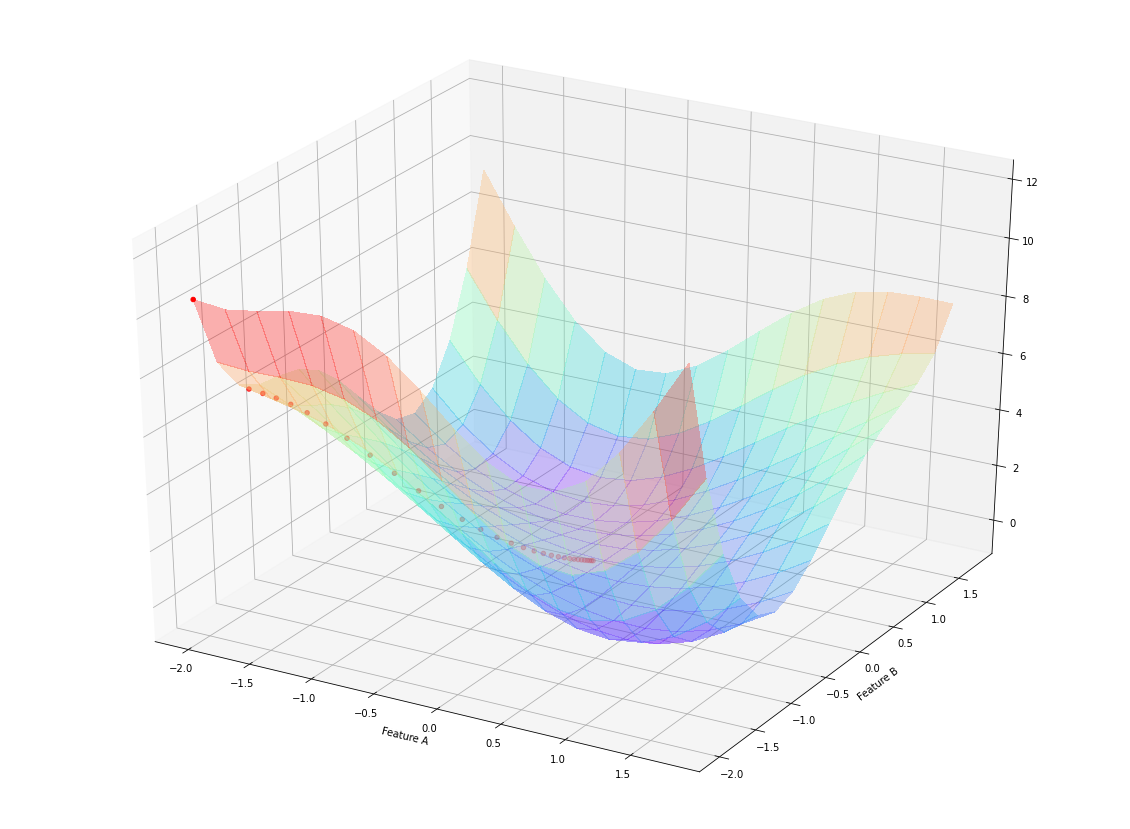

In [13]:

### 2D gradient descent 구현 


### 출처: https://mazdah.tistory.com/833 [꿈을 위한 단상:티스토리]에 나온 gradient descent코드를 gradient부분만 살짝 추가한 코드입니다.

import numpy as np
import matplotlib.pyplot as plt
#import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def f(a,b):
	return a**2 + (1/2)* b**4 +2* np.sin(a*b)

def grad_f(a,b): # gradient
  h=1e-5
  return [(f(a+h,b) - f(a-h,b))/(2*h),(f(a,b+h) - f(a,b-h))/(2*h)]


def gradient_descent(theta0, iters, alpha):
	history = [theta0] # to store all thetas
	theta = theta0     # initial values for thetas
	# main loop by iterations:
	for i in range(iters):
		gradient = grad_f(theta[0],theta[1]) #함수 f(x,y)의 gradient
		# update parameters:
		theta = [a - alpha*b for a,b in zip(theta, gradient)]
		history.append(theta)
	return history

history = gradient_descent(theta0 = [-2, -2], iters =30, alpha = 0.04)

# f(x,y) = x^2 + y^2 함수의 그래프 그리기
fig = plt.figure(figsize=(20, 15))
ax = fig.gca(projection='3d')
#plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
		 linewidth=0, antialiased=False, cmap='rainbow')


a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c =  f(a,b)
## c= 0 ## 최소값을 찾기 위한 부분
ax.scatter(a, b, c, color="r"); 

print(c)


plt.xlabel('Feature A')
plt.ylabel('Feature B')

##plt.axis('equal')

plt.show()

